<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Generating-the-Submission-File" data-toc-modified-id="Generating-the-Submission-File-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generating the Submission File</a></span><ul class="toc-item"><li><span><a href="#Creating-the-directory-for-the-submission-file" data-toc-modified-id="Creating-the-directory-for-the-submission-file-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Creating the directory for the submission file</a></span></li><li><span><a href="#Generating-the-submission-file" data-toc-modified-id="Generating-the-submission-file-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Generating the submission file</a></span></li></ul></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 2, Chapter 2, Section 2: Training Shallow Models
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 1
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 1 for Training Shallow Models (Part 2, Chapter 2, Section 2).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2022/slides/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s2_training_shallow_models).
- Here we will work on kaggle competation [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview).
- The goal of this homework is tweaking the pipeline (including data preprocessing, hyperparameter tuning and model selection) implemented in [/p2 c2 s2 training shallow models/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2022/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s2_training_shallow_models/case_study/case_study.ipynb) to make it work for the new kaggle competation mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **The baseline for this assignment is -0.332515. As per the grading rubrics (section 15 of the syllabus), if the validation score of your best model is lower than or the same as the baseline, you will only receive 80% of the full mark. See more details in the grading rubrics.**
- Submit an ipynb file named homework_1.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_1/.

# Notebook Configuration

## Google drive

In [71]:
# from google.colab import drive
import sys

# Mount Google Drive
# drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = ''

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = ''

# Get the absolute path of the shallow models folder
abspath_model_shallow = ''

## Warning

In [72]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [74]:
# The magic below allows us to use tensorflow version 2.x
# %tensorflow_version 2.x 
# import tensorflow as tf
# from tensorflow import keras

## Random seed

In [75]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
# tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

## Data Preprocessing
**Note: You will need to specify the date time variables, *datetime_vars*, when handling date time variables**.

In [76]:
# Change working directory to the absolute path of the shallow utilities folder
# %cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

### Loading the data

In [77]:
import pandas as pd
from os.path import abspath
from sklearn.model_selection import train_test_split
import re
import seaborn as sns

# Load the raw training data
df_raw_train = pd.read_csv(abspath_curr + 'train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv(abspath_curr + 'test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'trip_duration'

In [78]:
df_raw_train.info() # Personal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


## Dimension of the training set

In [79]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1458644,11


## Dimension of the test set

In [80]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,9


## Glimpse of train set

In [81]:
# Print the first 5 rows of df_train
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Glimpse of test set

In [82]:
# Print the first 5 rows of df_test
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


### Include distance between two geographical locations

In [83]:
from sklearn.metrics.pairwise import haversine_distances as hd

def get_distance(geo_df):
    earth_radius = 6371
    
    geo_df['pickup_longitude'] = np.radians(geo_df['pickup_longitude'])
    geo_df['pickup_latitude'] = np.radians(geo_df['pickup_latitude'])
    geo_df['dropoff_longitude'] = np.radians(geo_df['dropoff_longitude'])
    geo_df['dropoff_latitude'] = np.radians(geo_df['dropoff_latitude'])
    
    distance = geo_df.apply(lambda x: (hd([[x.pickup_latitude, x.pickup_longitude],
                                          [x.dropoff_latitude, x.dropoff_longitude]])[0,1])*earth_radius, 
                            axis=1)
    return distance

In [84]:
df_train['distance'] = get_distance(df_train.reset_index(drop=True)
                                .loc[:, ['pickup_latitude', 'pickup_longitude', 
                                         'dropoff_latitude', 'dropoff_longitude']])

In [85]:
df_test['distance'] = get_distance(df_test.reset_index(drop=True)
                                .loc[:, ['pickup_latitude', 'pickup_longitude', 
                                         'dropoff_latitude', 'dropoff_longitude']])

In [86]:
df_train.distance.describe()

count    1.458644e+06
mean     3.440864e+00
std      4.296538e+00
min      0.000000e+00
25%      1.231837e+00
50%      2.093717e+00
75%      3.875337e+00
max      1.240909e+03
Name: distance, dtype: float64

### Include day of week attribute

In [87]:
# Populate name of the week
import re

tr_datetime_idx = df_train.pickup_datetime.apply(lambda x: re.findall(r'\d{4}-\d{2}-\d{2}', x)[0])
df_train['dayofweek'] = pd.DatetimeIndex(tr_datetime_idx).day_name()
df_train['dayofweek_idx'] = pd.DatetimeIndex(tr_datetime_idx).dayofweek

In [88]:
ts_datetime_idx = df_test.pickup_datetime.apply(lambda x: re.findall(r'\d{4}-\d{2}-\d{2}', x)[0])
df_test['dayofweek'] = pd.DatetimeIndex(ts_datetime_idx).day_name()
df_test['dayofweek_idx'] = pd.DatetimeIndex(ts_datetime_idx).dayofweek

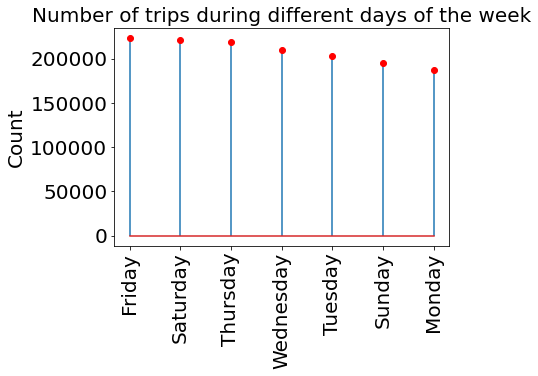

In [89]:
summary = pd.DataFrame(df_train.groupby('dayofweek').trip_duration.agg('count')
                               .sort_values(ascending=False))
plt.figure()
plt.stem(summary.index.values, summary.trip_duration, markerfmt='ro')
plt.xticks(ticks=list(range(len(summary.index.values))), labels=summary.index.values, rotation=90)
plt.ylabel('Count')
plt.title('Number of trips during different days of the week')
plt.show()


## Splitting the data

In [90]:
from sklearn.model_selection import train_test_split

# Divide the training data into training (80%) and validation (20%)
df_train, df_val = train_test_split(df_train, train_size=0.8, random_state=random_seed)

# Reset the index
df_train, df_val = df_train.reset_index(drop=True), df_val.reset_index(drop=True)

### Dimension of the training set

In [91]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,14


### Dimension of the validation set

In [92]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,14


## Handling uncommon features

### Identifying uncommon features

In [93]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,dayofweek
1,dayofweek_idx
2,distance
3,dropoff_latitude
4,dropoff_longitude
5,id
6,passenger_count
7,pickup_datetime
8,pickup_latitude
9,pickup_longitude


#### Difference between set of features in training set and set of features among entire data

##### The list of columns are present in the training set, but not in the other set - validation, test, etc.,

In [94]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature
0,dropoff_datetime


#### Difference between set of features in validation set and set of features among entire data

In [95]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature
0,dropoff_datetime


#### Difference between set of features in test set and set of features among entire data

In [96]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


## Removing uncommon features

In [97]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,dayofweek,dayofweek_idx
0,id0458976,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133,3.463778,Wednesday,2
1,id0434613,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887,2.891365,Monday,0
2,id3809234,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686,2.262636,Saturday,5
3,id1203705,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818,1.795030,Saturday,5
4,id1896645,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951,2.173389,Sunday,6


In [98]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,dayofweek,dayofweek_idx
0,id2793718,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,2.763050,Wednesday,2
1,id3485529,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,1.959178,Sunday,6
2,id1816614,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,1.404772,Sunday,6
3,id1050851,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,1.978660,Thursday,3
4,id0140657,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,20.837745,Thursday,3


In [99]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,dayofweek,dayofweek_idx
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426,Thursday,3
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239,Thursday,3
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155,Thursday,3
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088,Thursday,3
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842,Thursday,3


## Handling identifiers

### Combining the training, validation and test data

In [100]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

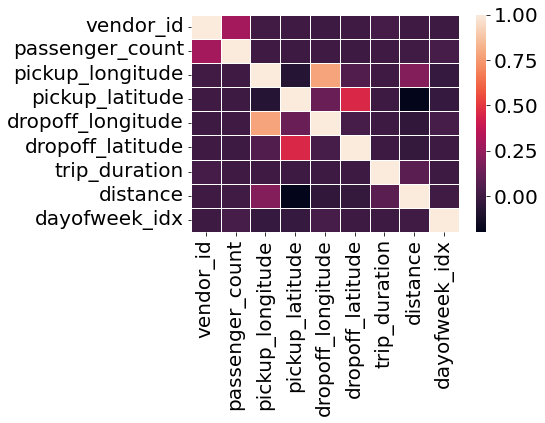

In [101]:
# Personal experiment
try:
    import pingouin as pg
except ImportError as e:
    !pip install pingouin

plt.figure()
sns.heatmap(df.reset_index(drop=True).pcorr(), linewidths=0.5)
plt.show()

### Identifying identifiers

In [102]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,id
0,id0458976
1,id0434613
2,id3809234
3,id1203705
4,id1896645


### Removing identifiers

In [103]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [104]:
df_train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,dayofweek,dayofweek_idx
0,2,2016-06-29 18:21:02,1,-73.862762,40.768822,-73.891701,40.746689,N,1133,3.463778,Wednesday,2
1,2,2016-04-25 13:03:26,1,-73.958038,40.783237,-73.975510,40.760853,N,887,2.891365,Monday,0
2,2,2016-05-07 12:36:09,1,-73.969460,40.785519,-73.989243,40.771748,N,686,2.262636,Saturday,5
3,1,2016-05-14 18:44:17,1,-73.981743,40.736549,-73.998352,40.726440,N,818,1.795030,Saturday,5
4,2,2016-04-10 22:51:25,1,-73.977913,40.752609,-73.975647,40.733139,N,951,2.173389,Sunday,6


In [105]:
df_val.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,dayofweek,dayofweek_idx
0,2,2016-06-08 07:36:19,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,2.763050,Wednesday,2
1,2,2016-04-03 12:58:11,1,-73.978394,40.764351,-73.991623,40.749859,N,827,1.959178,Sunday,6
2,2,2016-06-05 02:49:13,5,-73.989059,40.744389,-73.973381,40.748692,N,614,1.404772,Sunday,6
3,2,2016-05-05 17:18:27,2,-73.990326,40.731136,-73.991264,40.748917,N,867,1.978660,Thursday,3
4,1,2016-05-12 17:43:38,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,20.837745,Thursday,3


In [106]:
df_test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,dayofweek,dayofweek_idx
0,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426,Thursday,3
1,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239,Thursday,3
2,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155,Thursday,3
3,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088,Thursday,3
4,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842,Thursday,3


## Handling date time variables

### Transforming date time variables

In [107]:
df_train.columns

Index(['vendor_id', 'pickup_datetime', 'passenger_count', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'store_and_fwd_flag', 'trip_duration', 'distance', 'dayofweek',
       'dayofweek_idx'],
      dtype='object')

#### We have dropped the dropoff_datetime since the column is not present in the test data. Hence we end up with just pickup_datetime that need to be transformed

In [108]:
# Get the date time variables
datetime_vars = ['pickup_datetime']

In [109]:
df_train.loc[:, datetime_vars].head()

,pickup_datetime
0,2016-06-29 18:21:02
1,2016-04-25 13:03:26
2,2016-05-07 12:36:09
3,2016-05-14 18:44:17
4,2016-04-10 22:51:25


In [110]:
df_train.loc[:, datetime_vars].dtypes

pickup_datetime    object
dtype: object

In [111]:
df_val.loc[:, datetime_vars].dtypes

pickup_datetime    object
dtype: object

In [112]:
df_test.loc[:, datetime_vars].dtypes

pickup_datetime    object
dtype: object

In [113]:
tmp_x = df_train.pickup_datetime.sort_values().unique()
import re
tmp_y = [re.findall(r'\d{4}', x)[0]  for x in tmp_x]
print(np.unique(tmp_y))

['2016']


In [114]:
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
df_train = datetime_transformer(df_train, datetime_vars)

# Print the first 5 rows of df_train
df_train.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,dayofweek,dayofweek_idx,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,2,1,-73.862762,40.768822,-73.891701,40.746689,N,1133,3.463778,Wednesday,2,2016,6,29,18,21,2
1,2,1,-73.958038,40.783237,-73.975510,40.760853,N,887,2.891365,Monday,0,2016,4,25,13,3,26
2,2,1,-73.969460,40.785519,-73.989243,40.771748,N,686,2.262636,Saturday,5,2016,5,7,12,36,9
3,1,1,-73.981743,40.736549,-73.998352,40.726440,N,818,1.795030,Saturday,5,2016,5,14,18,44,17
4,2,1,-73.977913,40.752609,-73.975647,40.733139,N,951,2.173389,Sunday,6,2016,4,10,22,51,25


In [115]:
df_train.loc[:, ['pickup_datetime_year', 
                 'pickup_datetime_month', 
                 'pickup_datetime_day']].sort_values(by=['pickup_datetime_year'])

,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day
0,2016,6,29
777934,2016,1,11
777935,2016,5,21
777936,2016,3,29
777937,2016,5,23
...,...,...,...
388969,2016,1,31
388968,2016,2,26
388967,2016,6,10
388973,2016,4,5


In [116]:
df_train.loc[:, ['pickup_datetime_year', 
                 'pickup_datetime_month', 
                 'pickup_datetime_day']].dtypes

pickup_datetime_year     int64
pickup_datetime_month    int64
pickup_datetime_day      int64
dtype: object

In [117]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,dayofweek,dayofweek_idx,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,2,1,-73.985611,40.735943,-73.980331,40.760468,N,1040,2.763050,Wednesday,2,2016,6,8,7,36,19
1,2,1,-73.978394,40.764351,-73.991623,40.749859,N,827,1.959178,Sunday,6,2016,4,3,12,58,11
2,2,5,-73.989059,40.744389,-73.973381,40.748692,N,614,1.404772,Sunday,6,2016,6,5,2,49,13
3,2,2,-73.990326,40.731136,-73.991264,40.748917,N,867,1.978660,Thursday,3,2016,5,5,17,18,27
4,1,4,-73.789497,40.646675,-73.987137,40.759232,N,4967,20.837745,Thursday,3,2016,5,12,17,43,38


In [118]:
df_val.loc[:, ['pickup_datetime_year', 
                 'pickup_datetime_month', 
                 'pickup_datetime_day']].sort_values(by=['pickup_datetime_year'])

,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day
0,2016,6,8
194476,2016,4,29
194477,2016,4,25
194478,2016,3,6
194479,2016,2,19
...,...,...,...
97240,2016,4,4
97239,2016,4,15
97238,2016,3,8
97244,2016,3,27


In [119]:
df_val.loc[:, ['pickup_datetime_year', 
                 'pickup_datetime_month', 
                 'pickup_datetime_day']].dtypes

pickup_datetime_year     int64
pickup_datetime_month    int64
pickup_datetime_day      int64
dtype: object

In [120]:
# Call datetime_transformer on df_test
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,distance,dayofweek,dayofweek_idx,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day,pickup_datetime_hour,pickup_datetime_minute,pickup_datetime_second
0,1,1,-73.988129,40.732029,-73.990173,40.756680,N,2.746426,Thursday,3,2016,6,30,23,59,58
1,1,1,-73.964203,40.679993,-73.959808,40.655403,N,2.759239,Thursday,3,2016,6,30,23,59,53
2,1,1,-73.997437,40.737583,-73.986160,40.729523,N,1.306155,Thursday,3,2016,6,30,23,59,47
3,2,1,-73.956070,40.771900,-73.986427,40.730469,N,5.269088,Thursday,3,2016,6,30,23,59,41
4,1,1,-73.970215,40.761475,-73.961510,40.755890,N,0.960842,Thursday,3,2016,6,30,23,59,33


In [121]:
df_test.loc[:, ['pickup_datetime_year', 
                 'pickup_datetime_month', 
                 'pickup_datetime_day']].sort_values(by=['pickup_datetime_year'])

,pickup_datetime_year,pickup_datetime_month,pickup_datetime_day
0,2016,6,30
416751,2016,3,3
416752,2016,3,3
416753,2016,3,3
416754,2016,3,3
...,...,...,...
208380,2016,4,30
208381,2016,4,30
208382,2016,4,30
208375,2016,4,30


In [122]:
df_test.loc[:, ['pickup_datetime_year', 
                 'pickup_datetime_month', 
                 'pickup_datetime_day']].dtypes

pickup_datetime_year     int64
pickup_datetime_month    int64
pickup_datetime_day      int64
dtype: object

In [123]:
df_train.dtypes

vendor_id                   int64
passenger_count             int64
pickup_longitude          float64
pickup_latitude           float64
dropoff_longitude         float64
dropoff_latitude          float64
store_and_fwd_flag         object
trip_duration               int64
distance                  float64
dayofweek                  object
dayofweek_idx               int64
pickup_datetime_year        int64
pickup_datetime_month       int64
pickup_datetime_day         int64
pickup_datetime_hour        int64
pickup_datetime_minute      int64
pickup_datetime_second      int64
dtype: object

## Handling missing data

### Combining training, validation, and the test data

In [124]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [125]:
df.shape

(2083778, 17)

### Identifying missing values

In [126]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,trip_duration,0.3,float64


In [127]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,float64


In [128]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'float64'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,trip_duration,0.3,float64


## Separating the training, validation and test set

In [129]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [130]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,17


In [131]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,17


In [132]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,17


In [133]:
df_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'dayofweek', 'dayofweek_idx',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_hour', 'pickup_datetime_minute',
       'pickup_datetime_second'],
      dtype='object')

## Imputing missing values

In [140]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='median')

    # Impute the variables with missing values in df_train, df_val and df_test 
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

##### Technically I wouldn't have written a code to explicitly include dayofweek_idx, but I later included because KNN cannot accept categorical variables that are not one-hot encoded

In [143]:
# useful_cols = {'vendor_id', 'passenger_count', 'distance', 'dayofweek_idx', 
#                'pickup_datetime_month', 'pickup_datetime_day', 'pickup_datetime_hour'}
# cols_with_nan = set(df_miss['var'].values)

# useful_cols = list(useful_cols - cols_with_nan)
# useful_cols

## Encoding the data

### Combining training, validation and the test set

In [144]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,float64
1,object
2,int64


## Identifying categorical variables

In [145]:
df['pickup_datetime_year'] = df.pickup_datetime_year.astype(str)
df['pickup_datetime_month'] = df.pickup_datetime_month.astype(str)
df['vendor_id'] = df.vendor_id.astype(str)

In [146]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,dayofweek,7
1,pickup_datetime_month,6
2,vendor_id,2
3,store_and_fwd_flag,2
4,pickup_datetime_year,1


In [147]:
df.store_and_fwd_flag.unique()

array(['N', 'Y'], dtype=object)

### Encoding categorical features

In [148]:
df.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'distance', 'dayofweek', 'dayofweek_idx',
       'pickup_datetime_year', 'pickup_datetime_month', 'pickup_datetime_day',
       'pickup_datetime_hour', 'pickup_datetime_minute',
       'pickup_datetime_second'],
      dtype='object')

In [149]:
summary = pd.DataFrame(df.groupby('vendor_id').trip_duration.agg('mean').sort_values())

In [150]:
summary

,trip_duration
vendor_id,
1.0,790.401205
2.0,939.660463


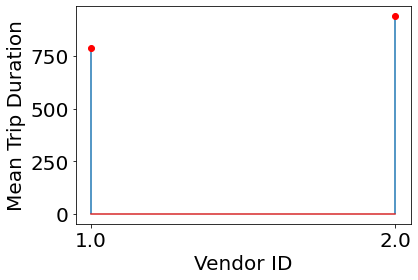

In [151]:
plt.figure()
plt.stem(summary.index.values, summary.trip_duration, markerfmt='ro')
plt.xlabel('Vendor ID')
plt.ylabel('Mean Trip Duration')
plt.show()

#### 5:29AM : Included vendor_id

In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

### Separating the training, validation and test data

In [153]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [154]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,1166915,30


In [155]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,291729,30


In [156]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,625134,30


## Splitting the feature and target

In [157]:
df_train.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'dayofweek_idx', 'pickup_datetime_day', 'pickup_datetime_hour',
       'pickup_datetime_minute', 'pickup_datetime_second', 'dayofweek_Friday',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'pickup_datetime_month_1.0', 'pickup_datetime_month_2.0',
       'pickup_datetime_month_3.0', 'pickup_datetime_month_4.0',
       'pickup_datetime_month_5.0', 'pickup_datetime_month_6.0',
       'pickup_datetime_year_2016', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'vendor_id_1.0', 'vendor_id_2.0'],
      dtype='object')

#### 5:29AM : Included vendor_id

In [161]:
numerical_vars = ['passenger_count', 'distance',
                  'pickup_datetime_day', 'pickup_datetime_hour']

# Removed vendor_id
dayofweek_names = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
categorical_vars = ['pickup_datetime_month_'+str(i)+'.0' for i in range(1, 7)]\
                   +['dayofweek_'+day for day in dayofweek_names]\
                   + ['store_and_fwd_flag_Y', 'store_and_fwd_flag_N', 
                      'vendor_id_1.0', 'vendor_id_2.0']

In [162]:
# Get the feature matrix
# X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
# X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
# X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

X_train = df_train[numerical_vars + categorical_vars].values
X_val = df_val[numerical_vars + categorical_vars].values
X_test = df_test[numerical_vars + categorical_vars].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

## Scaling the data

### Standardization

In [163]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [164]:
# Standardize the training data
# X_train = ss.fit_transform(X_train)
X_train = np.hstack([ss.fit_transform(X_train[:, :len(numerical_vars)]), 
                     X_train[:, len(numerical_vars):]])

# Standardize the validation data
# X_val = ss.transform(X_val)
X_val = np.hstack([ss.transform(X_val[:, :len(numerical_vars)]), 
                   X_val[:, len(numerical_vars):]])

# Standardize the test data
# X_test = ss.transform(X_test)
X_test = np.hstack([ss.transform(X_test[:, :len(numerical_vars)]), 
                    X_test[:, len(numerical_vars):]])

In [165]:
# Standardize the training data
y_train = ss.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

# Standardize the validation data
y_val = ss.transform(y_val.reshape(-1, 1)).reshape(-1)

# Standardize the test data
y_test = ss.transform(y_test.reshape(-1, 1)).reshape(-1)

# Hyperparameter Tuning

In [166]:
from sklearn.linear_model import SGDRegressor

models = {'sgd': SGDRegressor(random_state=random_seed, early_stopping=True,
                              max_iter=5000)
          } # SGD

In [167]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

## Predefined split cross-valiator

In [168]:
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

## GridSearchCV

In [169]:
param_grids = {}

In [170]:
# The parameter grid of eta
eta_grid = [1e-4, 1e-3, 1e-2, 1e-1]

# The parameter grid of alpha
alpha_grid = [0.01, 0.05, 0.1, 0.15, 0.2]

# Update param_grids
param_grids['sgd'] = [{'model__eta0': eta_grid,
                       'model__alpha': alpha_grid}]                 

In [171]:
alpha_grid

[0.01, 0.05, 0.1, 0.15, 0.2]

In [172]:
# Make directory
directory = os.path.dirname(abspath_curr + 'result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

### Tuning the hyperparameters

In [173]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = {}
overall_cv_results = {}

# For each model
gs = None # can access the model after refit
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='neg_mean_squared_error',
                      n_jobs=16,
                      cv=ps,
                      verbose=0,
                      return_train_score=True)
        
    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)
    
    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs[acronym] = [np.round(gs.best_score_, 3), gs.best_params_, gs.best_estimator_]
    
    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
    # For reference...
    overall_cv_results[acronym] = cv_results
    
    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
    # Move the important columns ahead
    # cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    # cv_results.to_csv(path_or_buf=abspath_curr + 'result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
# best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

In [174]:
best_score_params_estimator_gs

{'sgd': [-0.326,
  {'model__alpha': 0.05, 'model__eta0': 0.0001},
  Pipeline(steps=[('model',
                   SGDRegressor(alpha=0.05, early_stopping=True, eta0=0.0001,
                                max_iter=5000, random_state=42))])]}

In [175]:
best_scores = {}
best_alpha = {}
best_eta0 = {}

for acronym in pipes.keys():
    best_scores[acronym] = best_score_params_estimator_gs[acronym][0]
    best_alpha[acronym] = best_score_params_estimator_gs[acronym][1]['model__alpha']
    best_eta0[acronym] = best_score_params_estimator_gs[acronym][1]['model__eta0']

pd.DataFrame([best_scores, best_alpha, best_eta0]).T.rename(columns={0:'best_score', 
                                                                    1:'best_alpha',
                                                                    2:'best_eta0'})


,best_score,best_alpha,best_eta0
sgd,-0.326,0.05,0.0001


In [178]:
sample_vl_pred = gs.best_estimator_.predict(X_val)
from sklearn.metrics import mean_squared_error as mse

mse(y_val, sample_vl_pred)


0.32599443278652823

In [181]:
df_train.columns

Index(['passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration', 'distance',
       'dayofweek_idx', 'pickup_datetime_day', 'pickup_datetime_hour',
       'pickup_datetime_minute', 'pickup_datetime_second', 'dayofweek_Friday',
       'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday',
       'dayofweek_Thursday', 'dayofweek_Tuesday', 'dayofweek_Wednesday',
       'pickup_datetime_month_1.0', 'pickup_datetime_month_2.0',
       'pickup_datetime_month_3.0', 'pickup_datetime_month_4.0',
       'pickup_datetime_month_5.0', 'pickup_datetime_month_6.0',
       'pickup_datetime_year_2016', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'vendor_id_1.0', 'vendor_id_2.0'],
      dtype='object')

# Model Selection

In [274]:
# Implement me

# Generating the Submission File
Use the best model selected earlier to generate the submission file for this kaggle competition.

## Creating the directory for the submission file

In [275]:
# # Make directory
# directory = os.path.dirname(abspath_curr + 'result/submission/')
# if not os.path.exists(directory):
#     os.makedirs(directory)

## Generating the submission file

In [276]:
# # Get the prediction on the testing data using best_model
# y_test_pred = best_estimator_gs.predict(X_test)

# # Get the dataframe of y_test_pred, which has the same shape as df_train
# df_y_test_pred = pd.DataFrame(np.tile(y_test_pred.reshape(-1, 1), df_train.shape[1]),
#                               columns=df_train.columns)

# # Transform df_y_test_pred back to the original scale
# df_y_test_pred = pd.DataFrame(ss.inverse_transform(df_y_test_pred),
#                               columns=df_train.columns)

# # Get the submission dataframe
# df_submit = pd.DataFrame(np.hstack((df_raw_test[['id']], df_y_test_pred[[target]])),
#                          columns=['id', target])                                                                                      

# # Generate the submission file
# df_submit.to_csv(abspath_curr + 'result/submission/submission.csv', index=False)